In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp

Reading the dataset:

In [5]:
dataset = pd.read_csv('/content/sample_data/drug200.csv')


In [6]:
dataset.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
dataset.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

Description of Dataset:

In [8]:
dataset.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

Viewing through charts

<Axes: xlabel='Drug', ylabel='count'>

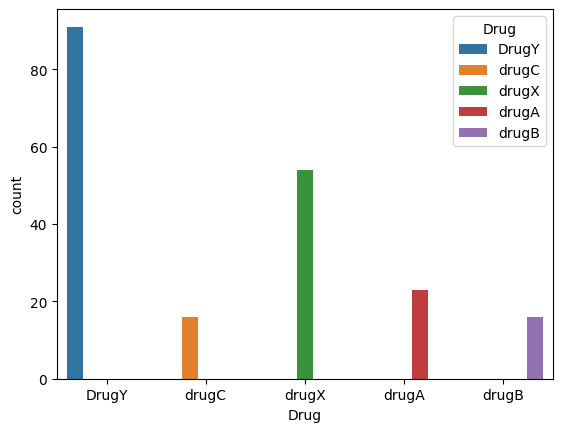

In [9]:
sb.countplot(x='Drug',data=dataset,hue='Drug')

<Axes: xlabel='Sex', ylabel='count'>

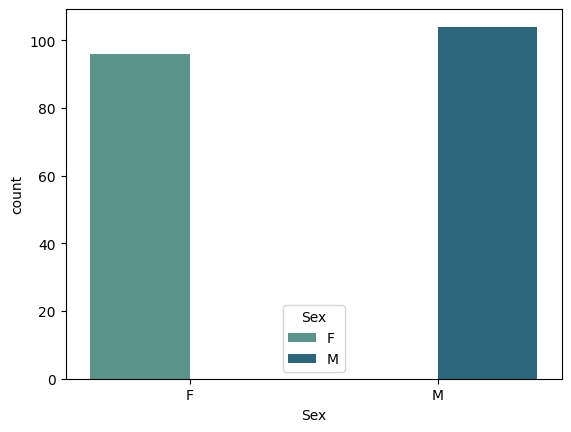

In [10]:
sb.countplot(x='Sex',data=dataset,palette='crest',hue='Sex')

<Axes: xlabel='BP', ylabel='count'>

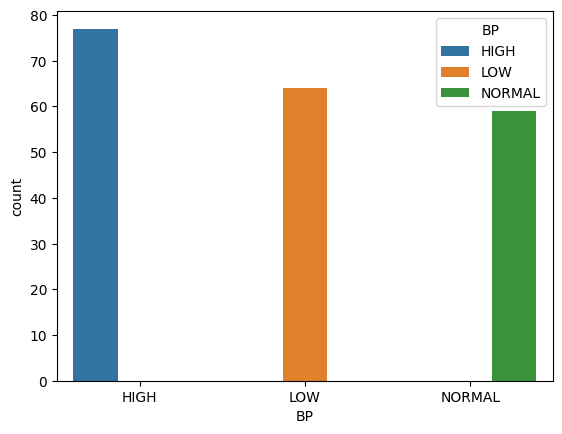

In [11]:
sb.countplot(x='BP',data=dataset,hue='BP')

<Axes: xlabel='Na_to_K', ylabel='Count'>

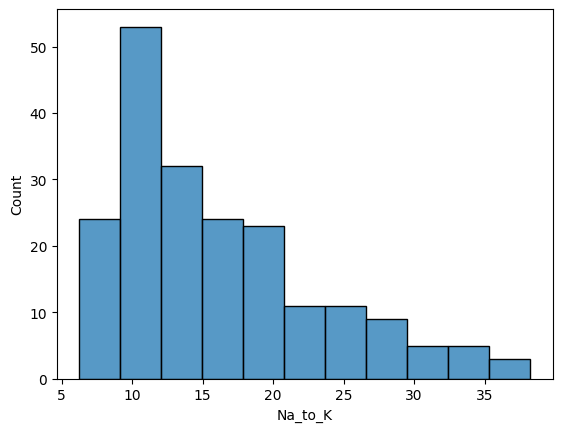

In [12]:
sb.histplot(x='Na_to_K',data=dataset)

In [13]:
X = dataset.drop(columns = ['Drug'],axis=1)
Y = dataset['Drug']

In [14]:
Y_class = len(np.unique(Y))
print(Y_class)

5


In [15]:
X = pd.get_dummies(X,columns=['Sex','BP','Cholesterol'],drop_first = True)

LE = LabelEncoder()
Y = LE.fit_transform(Y)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size=0.3,random_state=2)

Preprocessing the dataset:

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [23]:
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

Apllying input, min. 3 hidden layers and output layer:

In [19]:
model = Sequential()
model.add(Dense(48, input_dim=6, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
output_layer = Dense(Y_class,activation='softmax')
model.add(output_layer)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                336       
                                                                 
 dense_1 (Dense)             (None, 36)                1764      
                                                                 
 dense_2 (Dense)             (None, 24)                888       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Training the model:

In [26]:
model.fit(X_train,Y_train,epochs=48,batch_size=6)

Epoch 1/48


ValueError: ignored

Testing the model:

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc * 100)